In [1]:
import numpy as np
import time
from INST_6050A import INST_6050A
from INST_6626A import INST_6626A

load = INST_6050A(22)
print ("Electronic Load: " + load.identify())
psu = INST_6626A(3)
print ("Supply: " + psu.identify())

load.disable(1)
psu.disable(3)

Electronic Load: HEWLETT-PACKARD,6050A,0,A.01.01

Supply: HP6626A



In [2]:
minV = 5
maxV = 15
stepV = 5

minI = 0.1
maxI = 1.5
stepI = 0.2

print("Load testing from {:0.4f}A to {:0.4f}A in {:0.4f}A steps...".format(minI, maxI, stepI))
print("and {:0.4f}V to {:0.4f}V in {:0.4f}V steps...".format(minV, maxV, stepV))
print("")

tests = []
for V in np.arange(minV, maxV+stepV, stepV):
    print("V={:0.4f}".format(V))
    print("I\tPin\tPout\tEff")
    psu.setCurrent(3,2)
    psu.setVoltage(3,V)
    psu.enable(3)
    load.set(1,"CC",0)
    load.enable(1)
    Pins = []
    Pouts = []
    Effs = []
    Is = []
    for I in np.arange(minI, maxI+stepI, stepI):
        load.set(1,"CC",I)
        time.sleep(1)
        Pin = psu.getPower(3)
        Pout = load.getPower(1)
        Eff = Pout/Pin
        Im=load.getCurrent(1)
        print("{:0.4f}\t{:0.4f}\t{:0.4f}\t{:0.4f}".format(Im,Pin,Pout,Eff))
        Pins.append(Pin)
        Pouts.append(Pout)
        Is.append(Im)
        Effs.append(Eff)
    load.disable(1)
    tests.append([V,Is,Pins,Pout,Effs])


Load testing from 0.1000A to 1.5000A in 0.2000A steps...
and 5.0000V to 15.0000V in 5.0000V steps...

V=5.0000
I	Pin	Pout	Eff
0.1070	0.5897	0.5338	0.9053
0.3050	1.5830	1.5165	0.9580
0.5020	2.5765	2.4879	0.9656
0.7000	3.5760	3.4573	0.9668
0.8980	4.5750	4.4200	0.9661
1.1040	5.5730	5.3975	0.9685
1.3020	6.5705	6.3447	0.9656
1.5000	7.5750	7.2840	0.9616
V=10.0000
I	Pin	Pout	Eff
0.1070	1.1778	1.0694	0.9080
0.3050	3.1663	3.0433	0.9611
0.5020	5.1535	5.0004	0.9703
0.7000	7.1527	6.9620	0.9733
0.8980	9.1518	8.9000	0.9725
1.1040	11.1491	10.9240	0.9798
1.3020	13.1423	12.8610	0.9786
1.5000	15.1525	14.7930	0.9763
V=15.0000
I	Pin	Pout	Eff
0.1070	1.7687	1.6050	0.9074
0.3050	4.7545	4.5698	0.9612
0.5020	7.7355	7.5130	0.9712
0.7000	10.7346	10.4650	0.9749
0.8980	13.7352	13.4100	0.9763
1.1040	16.7298	16.4500	0.9833
1.3020	19.7213	19.3790	0.9826
1.5000	22.7370	22.3010	0.9808


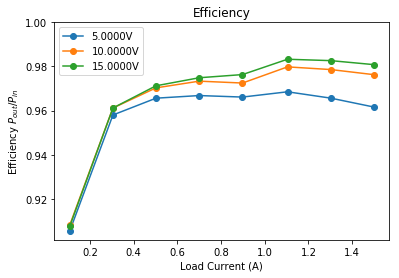

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
for t in tests:
    plt.plot(t[1],t[4], '-o', label='{:.4f}V'.format(t[0]))    
plt.legend()
plt.title('Efficiency')
plt.xlabel('Load Current (A)')
plt.ylabel('Efficiency $P_{out}$/$P_{in}$')
plt.ylim(top=1)
plt.show()